# **K Nearest Neighbors Find "K"-inator**

# **Imports**

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from google.colab import files
uploaded = files.upload()
%matplotlib inline

Saving bank-additional-full2.csv to bank-additional-full2.csv
Saving bank-additional2.csv to bank-additional2.csv
Saving bank-full2.csv to bank-full2.csv
Saving bank2.csv to bank2.csv


In [2]:
#Created own CSVs with fixed columns
import io
bankaddfull = pd.read_csv('bank-additional-full2.csv')
bankadd = pd.read_csv('bank-additional2.csv')
bankfull = pd.read_csv('bank-full2.csv')
bank = pd.read_csv('bank2.csv')

In [3]:
bankaddfull=bankaddfull.drop_duplicates()

# **Converting Categorical to Binary**

In [7]:
## Converting Categorical to Binary  

### Using Dummy Variables

yDum = pd.get_dummies(bankaddfull['y'],drop_first=True)
yDum

#Converting Job 
jobDum = pd.get_dummies(bankaddfull['job'],drop_first=True, prefix='job')
jobDum

#Converting Marital 
maritalDum = pd.get_dummies(bankaddfull['marital'],drop_first=True, prefix='marital')
maritalDum

#Converting Education 
eduDum = pd.get_dummies(bankaddfull['education'],drop_first=True,prefix='education')
eduDum

#Converting Default
defaultDum = pd.get_dummies(bankaddfull['default'],drop_first=True,prefix='default')
defaultDum

#Converting Housing
housingDum = pd.get_dummies(bankaddfull['housing'],drop_first=True,prefix='housing')
housingDum

#Converting Loan
loanDum = pd.get_dummies(bankaddfull['loan'],drop_first=True,prefix='loan')
loanDum

#Converting contact
contactDum = pd.get_dummies(bankaddfull['contact'],drop_first=True,prefix='contact')
contactDum

#Converting Month
monthDum = pd.get_dummies(bankaddfull['month'],drop_first=True,prefix='month')
monthDum

#Converting poutcome 
poutcomeDum = pd.get_dummies(bankaddfull['poutcome'],drop_first=True,prefix='poutcome')
poutcomeDum

#Converting Day of Week
dayDum = pd.get_dummies(bankaddfull['day_of_week'],drop_first=True)
dayDum

dataDummy = pd.concat((bankaddfull, yDum, jobDum,maritalDum,eduDum,defaultDum,housingDum,loanDum,contactDum,monthDum,poutcomeDum,dayDum),axis=1)
dataDummy = dataDummy.drop(['y','job','marital','education','default','housing','loan','contact','month','poutcome','day_of_week'], axis=1)
dataDummy.info()

dataDummy

### Label Econding 

#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

#Creating DF
yesLE= pd.DataFrame(bankaddfull['y'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
yesLE['yes_LE'] = labelencoder.fit_transform(yesLE['y'])
#Dropping 'y' column
yesLE= yesLE.drop(['y'],axis=1)
yesLE

#Creating DF
jobLE= pd.DataFrame(bankaddfull['job'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
jobLE['job_LE'] = labelencoder.fit_transform(jobLE['job'])
#Dropping 'job' column
jobLE= jobLE.drop(['job'],axis=1)
jobLE

#Creating DF
maritalLE= pd.DataFrame(bankaddfull['marital'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
maritalLE['marital_LE'] = labelencoder.fit_transform(maritalLE['marital'])
#Dropping 'marital' column
maritalLE= maritalLE.drop(['marital'],axis=1)
maritalLE

#Creating DF
educationLE= pd.DataFrame(bankaddfull['education'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
educationLE['education_LE'] = labelencoder.fit_transform(educationLE['education'])
#Dropping 'education' column
educationLE= educationLE.drop(['education'],axis=1)
educationLE

#Creating DF
defaultLE= pd.DataFrame(bankaddfull['default'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
defaultLE['default_LE'] = labelencoder.fit_transform(defaultLE['default'])
#Dropping 'default' column
defaultLE= defaultLE.drop(['default'],axis=1)
defaultLE

#Creating DF
housingLE= pd.DataFrame(bankaddfull['housing'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
housingLE['housing_LE'] = labelencoder.fit_transform(housingLE['housing'])
#Dropping 'housing' column
housingLE= housingLE.drop(['housing'],axis=1)
housingLE

#Creating DF
loanLE= pd.DataFrame(bankaddfull['loan'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
loanLE['loan_LE'] = labelencoder.fit_transform(loanLE['loan'])
#Dropping 'loan' column
loanLE= loanLE.drop(['loan'],axis=1)
loanLE

#Creating DF
contactLE= pd.DataFrame(bankaddfull['contact'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
contactLE['contact_LE'] = labelencoder.fit_transform(contactLE['contact'])
#Dropping 'contact' column
contactLE= contactLE.drop(['contact'],axis=1)
contactLE

#Creating DF
monthLE= pd.DataFrame(bankaddfull['month'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
monthLE['month_LE'] = labelencoder.fit_transform(monthLE['month'])
#Dropping 'month' column
monthLE= monthLE.drop(['month'],axis=1)
monthLE

#Creating DF
poutcomeLE= pd.DataFrame(bankaddfull['poutcome'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
poutcomeLE['poutcome_LE'] = labelencoder.fit_transform(poutcomeLE['poutcome'])
#Dropping 'poutcome' column
poutcomeLE= poutcomeLE.drop(['poutcome'],axis=1)
poutcomeLE

#Creating DF
dayLE= pd.DataFrame(bankaddfull['day_of_week'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
dayLE['day_LE'] = labelencoder.fit_transform(dayLE['day_of_week'])
#Dropping 'y' column
dayLE= dayLE.drop(['day_of_week'],axis=1)
dayLE

dataLE = pd.concat((bankaddfull, yesLE, jobLE,maritalLE,educationLE,defaultLE,housingLE,loanLE,contactLE,monthLE,poutcomeLE,dayLE),axis=1)
dataLE = dataLE.drop(['y','job','marital','education','default','housing','loan','contact','month','poutcome','day_of_week'], axis=1)
dataLE

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   duration                       41176 non-null  int64  
 2   campaign                       41176 non-null  int64  
 3   pdays                          41176 non-null  int64  
 4   previous                       41176 non-null  int64  
 5   emp.var.rate                   41176 non-null  float64
 6   cons.price.idx                 41176 non-null  float64
 7   cons.conf.idx                  41176 non-null  float64
 8   euribor3m                      41176 non-null  float64
 9   nr.employed                    41176 non-null  float64
 10  yes                            41176 non-null  uint8  
 11  job_blue-collar                41176 non-null  uint8  
 12  job_entrepreneur               41176 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,yes_LE,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,contact_LE,month_LE,poutcome_LE,day_LE
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,3,1,0,0,0,0,1,6,1,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,7,1,3,1,0,0,1,6,1,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,7,1,3,0,2,0,1,6,1,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,1,0,0,0,1,6,1,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,5,1,5,0,2,0,0,7,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,1,5,0,0,0,0,7,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,5,1,6,0,2,0,0,7,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,9,1,5,0,0,0,0,7,1,0


In [8]:
dataLE

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,yes_LE,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,contact_LE,month_LE,poutcome_LE,day_LE
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,3,1,0,0,0,0,1,6,1,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,7,1,3,1,0,0,1,6,1,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,7,1,3,0,2,0,1,6,1,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,1,0,0,0,1,6,1,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,5,1,5,0,2,0,0,7,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,1,5,0,0,0,0,7,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,5,1,6,0,2,0,0,7,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,9,1,5,0,0,0,0,7,1,0


In [9]:
dataDummy

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,mon,thu,tue,wed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [10]:
#Importing Important Modeling 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# **Label Encoding**

In [11]:
dataLE_X = dataLE.loc[:, dataLE.columns != 'yes_LE']
print("Shape of X:", dataLE_X.shape)
dataLE_y = dataLE["yes_LE"]
print("Shape of Y:", dataLE_y.shape)

Shape of X: (41176, 20)
Shape of Y: (41176,)


In [12]:
from sklearn.model_selection import train_test_split
X_LE_train, X_LE_test, y_LE_train, y_LE_test = train_test_split(dataLE_X, dataLE_y, test_size=0.25, random_state=42)

In [13]:
#Import KNN
from sklearn.neighbors import KNeighborsClassifier

In [14]:
error_rate = []
for i in range(1,40):
    knn_LE = KNeighborsClassifier(n_neighbors=i)
    knn_LE.fit(X_LE_train,y_LE_train)
    pred_i = knn_LE.predict(X_LE_test)
    
    error_rate.append(np.mean(pred_i != y_LE_test))

Text(0, 0.5, 'Error Rate')

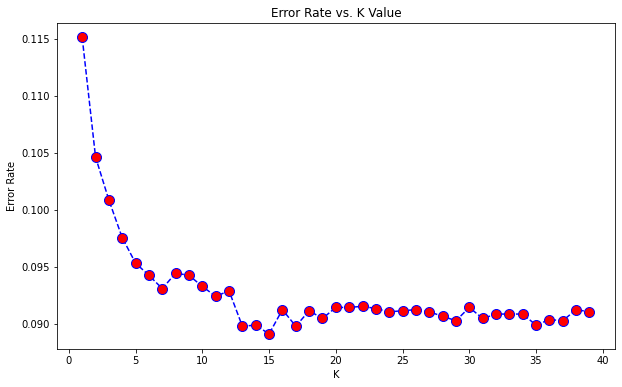

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
knn_error_rate = pd.DataFrame(error_rate)
knn_error_rate.min()
knn_error_rate.idxmin()

0    14
dtype: int64

In [32]:
knn_error_rate

,0
0,0.115116
1,0.104624
2,0.100835
3,0.097533
4,0.095298
5,0.094230
6,0.093064
7,0.094424
8,0.094230
9,0.093258


# **Dummy Variable**

In [34]:
dataDummy = dataDummy.drop_duplicates()
dataDummy.shape

(41176, 54)

In [35]:
dataDummy_X = dataDummy.loc[:, dataDummy.columns != 'yes']
print("Shape of X:", dataDummy_X.shape)
dataDummy_y = dataDummy['yes']
print("Shape of Y:", dataDummy_y.shape)

Shape of X: (41176, 53)
Shape of Y: (41176,)


In [36]:
from sklearn.model_selection import train_test_split
X_Dum_train, X_Dum_test, y_Dum_train, y_Dum_test = train_test_split(dataDummy_X, dataDummy_y, test_size=0.25, random_state=42)

In [37]:
error_rate = []
for i in range(1,40):
    knn_Dum = KNeighborsClassifier(n_neighbors=i)
    knn_Dum.fit(X_Dum_train,y_Dum_train)
    pred_i = knn_Dum.predict(X_Dum_test)
    
    error_rate.append(np.mean(pred_i != y_Dum_test))

Text(0, 0.5, 'Error Rate')

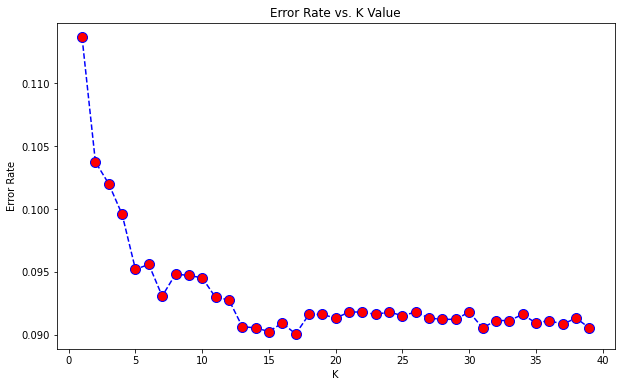

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
knn_error_rate = pd.DataFrame(error_rate)
knn_error_rate.min()
knn_error_rate.idxmin()

0    16
dtype: int64

In [42]:
knn_error_rate

,0
0,0.113658
1,0.103750
2,0.102001
3,0.099573
4,0.095201
5,0.095590
6,0.093064
7,0.094813
8,0.094715
9,0.094521
